## Método de la transformada inversa  
Generación de números (pseudo)aleatorios con una distribución de probabilidad especifica

### Distribución Triangular

$$
    f(x;a = 1 , b = 3, c = 5) = 
    \begin{cases}
        \frac{(x-1)}{4} \ ;\quad 1 \leq x < 3\\
        \frac{(5-x)}{4} \ ;\quad 3 \leq x \leq 5
    \end{cases} 
$$


$$
    \operatorname{E}(x) = \frac{a + b + c}{3} = \frac{1 + 5 + 3}{3} = \frac{9}{3} = 3
$$

$$
    \operatorname{Var}(x) = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18} = \frac{1 + 25 + 9 - 5 - 3 - 15}{18} = \frac{2}{3}
$$

$$
    F(x) =
    \begin{cases}
        \frac{(x-1)^2}{8} \ ; \quad 1 \leq x < 3\\
        1 - \frac{(5-x)^2}{8} \ ;\quad 3 \leq x \leq 5
    \end{cases}
    \implies
    F^{-1}(y) = 
    \begin{cases}
        1 + \sqrt{8y} \ ; \quad 0 \leq y < \frac{1}{2}\\
        5 - \sqrt{8(1-y)} \ ; \quad \frac{1}{2} \leq y \leq 1\\
    \end{cases}
$$

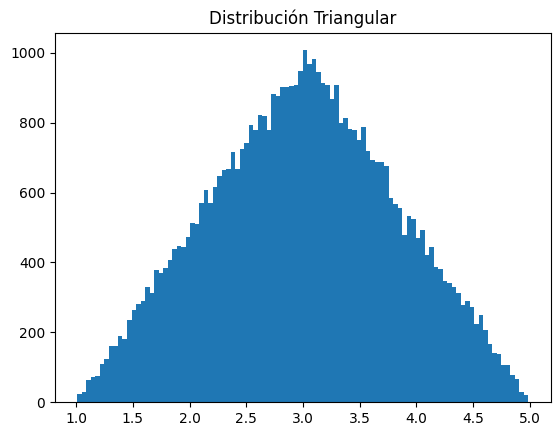

Valor esperado: 3.0009563466286218
Valor esperado real: 3
Varianza: 0.6647482161434546
Varianza real: 0.6666666666666666


In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

#Definimos una función que generara una serie de números aleatorios con una distribución triangular
def Triangle(a = 0, b = .5, c = 1, n = 10000):
    x = []

    for i in range(n):
        y = random()

        #Se aplica la función inversa de la distribución triangular
        if (y <= (b-a)/(c-a)): #Si los valores aleatorios generados son menores o iguales al area que hay entre a y b
            x.append(np.sqrt((c-a)*(b-a)*y)+a)
        elif (y > (b-a)/(c-a)): #Si los valores aleatorios generados son mayores al area que hay entre b y c
            x.append(c - np.sqrt((1-y)*(c-a)*(c-b)))
        else:
            x.append(0)
    return x

#Se generan n valores aleatorios con la distribución triangular
#Y se gráfica un histograma con los resultados, lo que vendría a ser una gráfica de su distribución
rand_values = Triangle(1,3,5,50000)
plot = plt.hist(rand_values, bins = 100)
plt.title("Distribución Triangular")
plt.show()

#Calculamos la media y varianza de los valores generados
print("Valor esperado:", np.mean(rand_values))
print("Valor esperado real: 3")
print("Varianza:", np.var(rand_values))
print("Varianza real:", 2/3)